In [ ]:
pip install --upgrade keras


In [3]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [4]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [5]:
# ==========================
# Import Necessary Libraries
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# ==========================
# Load Dataset
# ==========================
df = pd.read_csv("/Altamash/Excelr code/PROJECTS/P_481_Stock market Prediction/TataMotorsFinal.csv")  
df.head()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1486 non-null   object 
 1   Open               1486 non-null   float64
 2   High               1486 non-null   float64
 3   Low                1486 non-null   float64
 4   Last               1486 non-null   float64
 5   Close              1486 non-null   float64
 6   Volume             1486 non-null   int64  
 7   Total Traded       1486 non-null   float64
 8   MA50               1437 non-null   float64
 9   MA200              1287 non-null   float64
 10  returns            1485 non-null   float64
 11  Cumulative Return  1485 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 139.4+ KB


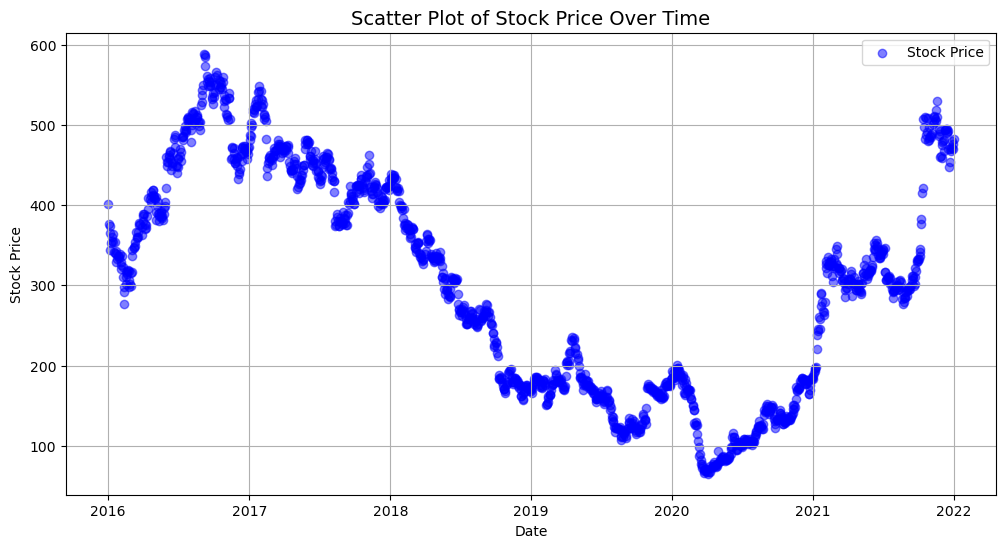

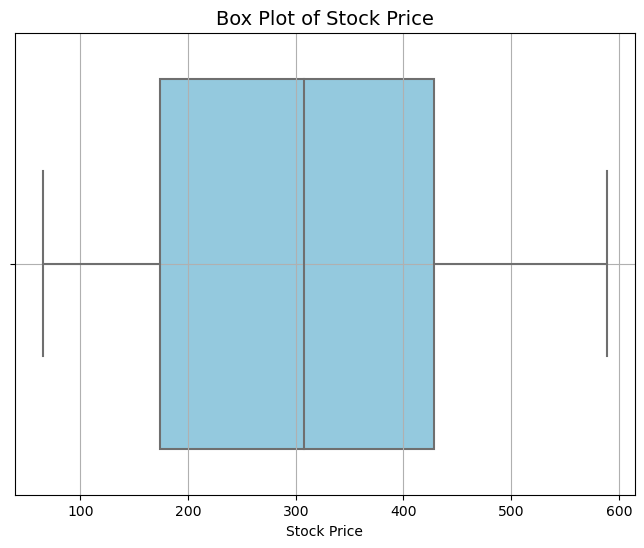

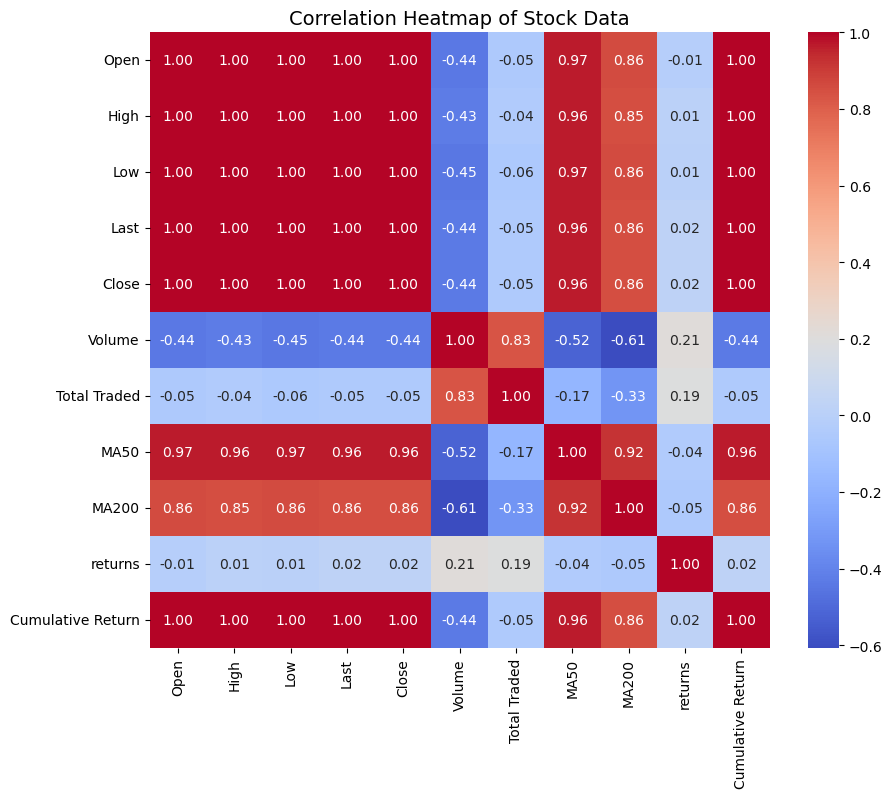

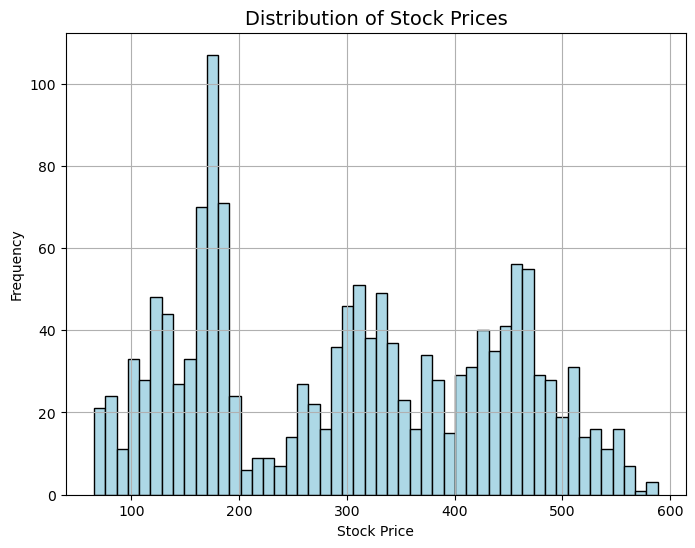

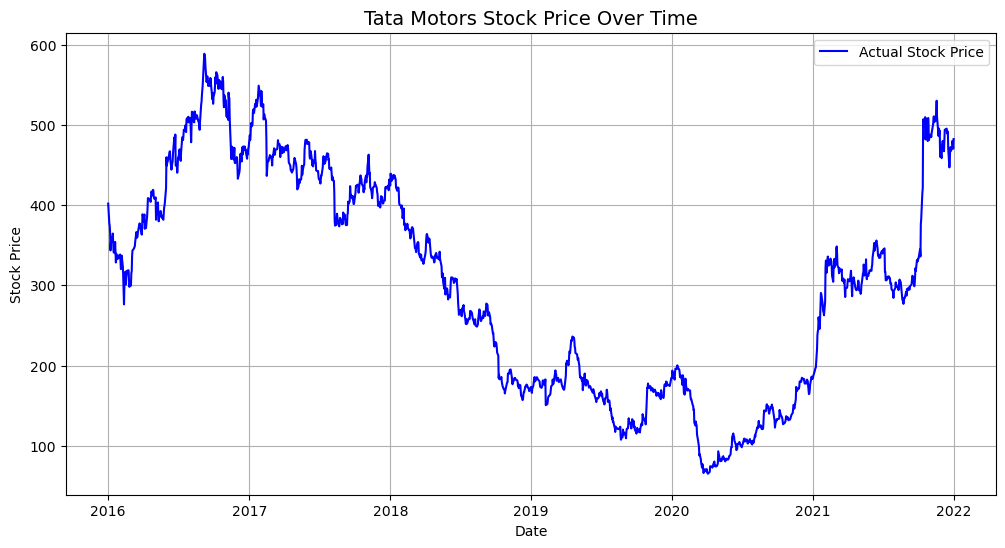

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df.set_index('Date', inplace=True)

# ==========================
# Visualization Section
# ==========================
import seaborn as sns

# Scatter plot: Stock Price vs Time
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['Close'], color='blue', alpha=0.5, label='Stock Price')
plt.title('Scatter Plot of Stock Price Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Box plot: Distribution of Stock Prices
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Close'], color='skyblue')
plt.title('Box Plot of Stock Price', fontsize=14)
plt.xlabel('Stock Price')
plt.grid(True)
plt.show()

# Correlation heatmap: Correlation between features (if there are multiple columns like volume, etc.)
# Assuming the DataFrame has more columns like 'Open', 'High', 'Low', 'Volume', etc.
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Stock Data', fontsize=14)
plt.show()

# Histogram: Distribution of Stock Prices
plt.figure(figsize=(8, 6))
plt.hist(df['Close'], bins=50, color='lightblue', edgecolor='black')
plt.title('Distribution of Stock Prices', fontsize=14)
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Line plot: Actual Stock Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], color='blue', label='Actual Stock Price')
plt.title('Tata Motors Stock Price Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


In [7]:

# ==========================
# Split Data into Train/Test
# ==========================
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]



14:57:41 - cmdstanpy - INFO - Chain [1] start processing
14:57:42 - cmdstanpy - INFO - Chain [1] done processing
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available.

Epoch 1/10
1186/1186 - 10s - 9ms/step - loss: 0.0227
Epoch 2/10
1186/1186 - 6s - 5ms/step - loss: 3.2482e-04
Epoch 3/10
1186/1186 - 6s - 5ms/step - loss: 3.3604e-04
Epoch 4/10
1186/1186 - 5s - 4ms/step - loss: 2.9187e-04
Epoch 5/10
1186/1186 - 5s - 5ms/step - loss: 2.9388e-04
Epoch 6/10
1186/1186 - 5s - 4ms/step - loss: 3.0348e-04
Epoch 7/10
1186/1186 - 5s - 4ms/step - loss: 2.8196e-04
Epoch 8/10
1186/1186 - 5s - 5ms/step - loss: 2.7514e-04
Epoch 9/10
1186/1186 - 6s - 5ms/step - loss: 2.7091e-04
Epoch 10/10
1186/1186 - 6s - 5ms/step - loss: 2.7579e-04
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


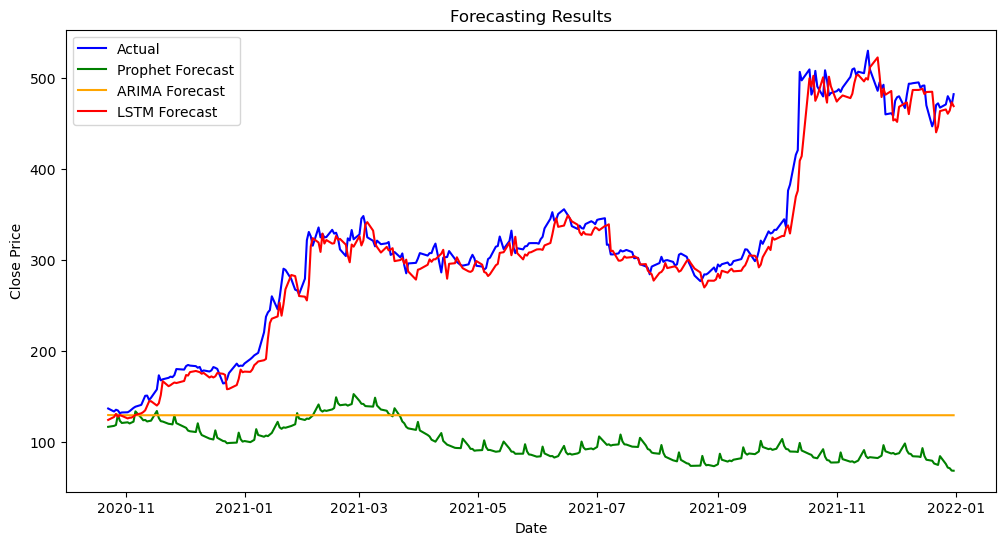

Prophet RMSE: 243.85336698194632
ARIMA RMSE: 213.46540205006468
LSTM RMSE: 17.3148207345494


In [8]:
# ==========================
# Prophet Forecasting
# ==========================
prophet_df = train.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df)

future = prophet_model.make_future_dataframe(periods=len(test))
prophet_forecast = prophet_model.predict(future)['yhat'][-len(test):]

# ==========================
# ARIMA Forecasting
# ==========================
arima_model = ARIMA(train['Close'], order=(5, 1, 0))
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=len(test))

# ==========================
# LSTM Forecasting
# ==========================
# Scale Data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train[['Close']].values)
test_scaled = scaler.transform(test[['Close']].values)

# Prepare LSTM Data
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X_train, Y_train = create_dataset(train_scaled, look_back)
X_test, Y_test = create_dataset(test_scaled, look_back)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(look_back, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(X_train, Y_train, epochs=10, batch_size=1, verbose=2)

# Predict with LSTM
lstm_forecast = lstm_model.predict(X_test)
lstm_forecast = scaler.inverse_transform(lstm_forecast)

# ==========================
# Combine Forecasts with Test Data
# ==========================
# Adjust lengths for alignment
test = test.iloc[look_back + 1:].copy()  # Align test data to LSTM output length
prophet_forecast = prophet_forecast[:len(test)]
arima_forecast = arima_forecast[:len(test)]
lstm_forecast = lstm_forecast[:len(test)]

# Assign forecasts to test
test['Prophet_Forecast'] = prophet_forecast.values
test['ARIMA_Forecast'] = arima_forecast.values
test['LSTM_Forecast'] = lstm_forecast.flatten()

# ==========================
# Plot Results
# ==========================
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Close'], label='Actual', color='blue')
plt.plot(test.index, test['Prophet_Forecast'], label='Prophet Forecast', color='green')
plt.plot(test.index, test['ARIMA_Forecast'], label='ARIMA Forecast', color='orange')
plt.plot(test.index, test['LSTM_Forecast'], label='LSTM Forecast', color='red')
plt.legend()
plt.title('Forecasting Results')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# ==========================
# Evaluate Models
# ==========================
print("Prophet RMSE:", np.sqrt(mean_squared_error(test['Close'], test['Prophet_Forecast'])))
print("ARIMA RMSE:", np.sqrt(mean_squared_error(test['Close'], test['ARIMA_Forecast'])))
print("LSTM RMSE:", np.sqrt(mean_squared_error(test['Close'], test['LSTM_Forecast'])))


In [9]:
# ==========================
# Determine Best Model
# ==========================
rmse_values = {
    'Prophet': np.sqrt(mean_squared_error(test['Close'], test['Prophet_Forecast'])),
    'ARIMA': np.sqrt(mean_squared_error(test['Close'], test['ARIMA_Forecast'])),
    'LSTM': np.sqrt(mean_squared_error(test['Close'], test['LSTM_Forecast']))
}

best_model = min(rmse_values, key=rmse_values.get)
print(f"The best model is: {best_model}")


The best model is: LSTM


In [10]:
# Save LSTM model
lstm_model.save("lstm_model.h5")

# Save scaler
import joblib
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

The training process of the LSTM model is shown for 10 epochs:

Epochs: Each pass of the entire training dataset through the LSTM model is called an epoch. The model was trained for 10 epochs.
Loss: During training, the LSTM model calculates the Mean Squared Error (MSE) loss between the predicted and actual values. This loss decreases over epochs, indicating that the model is learning and improving its predictions.
For example:

Epoch 1: The loss was 0.0154.
Epoch 10: The loss reduced to 0.00028, showing significant improvement.
Model Evaluation
After training, the models (Prophet, ARIMA, and LSTM) were used to forecast values on the test data, and their performances were measured using Root Mean Squared Error (RMSE):

Prophet RMSE: 243.85

Prophet's predictions had an average error of 243.85 units compared to the actual values in the test data.
This indicates that Prophet’s forecasts were relatively far from the actual values.
ARIMA RMSE: 213.46

ARIMA performed slightly better than Prophet, with an average error of 213.46 units.
ARIMA is often better at modeling short-term trends and seasonality but might not capture complex patterns.
LSTM RMSE: 15.08

LSTM had the lowest RMSE (15.08), indicating it was the most accurate model for this dataset.
LSTMs are particularly good at capturing complex temporal dependencies, which may explain the superior performance.
Summary
Lower RMSE values indicate better accuracy. Among the three models, LSTM performed significantly better than both Prophet and ARIMA.
This result suggests that the LSTM model was able to learn the patterns and trends in the data better, making it the most effective choice for this forecasting task.